# Exercise

### Baidu News Report

- get the source code

In [5]:
import requests
url = 'https://www.baidu.com/s?rtt=1&bsst=1&cl=2&tn=news&word=%E9%98%BF%E9%87%8C%E5%B7%B4%E5%B7%B4'
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36'}
res = requests.get(url, headers=headers).text
print(res)

<!DOCTYPE html>
<!--STATUS OK-->


















				















	                                    

														












    

	

    



	


	
        
			        
	
			        
	
			        
			    

	
        
			        
	
			        
	
			        
			    






















<html>
	<head>
		
		<meta http-equiv="content-type" content="text/html;charset=utf-8">
		<link rel="shortcut icon" href="//www.baidu.com/cache/icon/favicon.ico"/>
		
		
<title>百度资讯搜索_阿里巴巴</title>

		
<style data-compress="strip">
body{color:#000;background:#fff;padding:0;margin:0;position:relative}
body,th,td,.p1,.p2{font-family:arial}
p,form,ol,ul,li,dl,dt,dd,h3{margin:0;padding:0;list-style:none}
input{padding-top:0;padding-bottom:0;-moz-box-sizing:border-box;-webkit-box-sizing:border-box;box-sizing:border-box}
table,img{border:0}
td{font-size:9pt;line-height:18px}
em{font-style:normal;color:#C60A00}
a em{text-decoration:underline}
cite{font-style:normal;color:#008000}
.g,a.g{color:#008000}

- regular expression

In [6]:
import re
content = 'hello 123 world'
result = re.findall('\d\d\d', content)
result

['123']

In [7]:
content = 'hello 123 world 456 华小智Python基础教学 789'
result = re.findall('\d\d\d', content)
result

['123', '456', '789']

In [10]:
content = '文本A百度新闻文本B'
p_content = '文本A(.*?)文本B'
result = re.findall(p_content, content)
result

['百度新闻']

In [12]:
content = '<p class="c-author"> <img class="source-icon" src="https://cambrian-images.cdn.bcebos.com/bf3cd02370b9c278a65c5e5ce3bb7fbc_1549608413453462.jpeg@w_100,h_100" alt="" /> 环球网&nbsp;&nbsp; 30分钟前</p>'
p_content = '<p class="c-author">(.*?)</p>'
result = re.findall(p_content, content)
result

[' <img class="source-icon" src="https://cambrian-images.cdn.bcebos.com/bf3cd02370b9c278a65c5e5ce3bb7fbc_1549608413453462.jpeg@w_100,h_100" alt="" /> 环球网&nbsp;&nbsp; 30分钟前']

In [15]:
content = '''<h3 class="c-title">
 <a href="http://baijiahao.baidu.com/s?id=1651135613059945789&amp;wfr=spider&amp;for=pc"
    data-click="{
      'f0':'77A717EA',
      'f1':'9F63F1E4',
      'f2':'4CA6DE6E',
      'f3':'54E5243F',
      't':'1574758832'
      }"

                target="_blank"
            
    >
      做公益为什么选这些冷门?<em>阿里巴巴</em>合伙人首度披露公益初心和收获
    </a>'''
p_href = '<h3 class="c-title">.*?href="(.*?)"'
p_title = '<h3 class="c-title">.*?>(.*?)</a>'
href = re.findall(p_href, content, re.S)
title = re.findall(p_title, content, re.S)
print(href)
for t in title:
    print(t.strip())

['http://baijiahao.baidu.com/s?id=1651135613059945789&amp;wfr=spider&amp;for=pc']
做公益为什么选这些冷门?<em>阿里巴巴</em>合伙人首度披露公益初心和收获


- Baidu News

In [43]:
import requests
import pandas as pd

# get the resource code
url = 'https://www.baidu.com/s?rtt=1&bsst=1&cl=2&tn=news&word=%E9%98%BF%E9%87%8C%E5%B7%B4%E5%B7%B4'
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36'}
res = requests.get(url, headers=headers).text

# extracting source, date, link and title
p_info = '<p class="c-author">(.*?)</p>'
info = re.findall(p_info, res, re.S)
p_link = '<h3 class="c-title">.*?href="(.*?)"'
p_title = '<h3 class="c-title">.*?>(.*?)</a>'
link = re.findall(p_link, res, re.S)
title = re.findall(p_title, res, re.S)

# data cleaning and output
for i, t in enumerate(title):
    c_t = t.strip()
    title[i] = re.sub('<.*?>', '', c_t)

source = []
date = []
for inf in info:
    c_inf = inf.split('&nbsp;&nbsp;')
    c_inf[0] = re.sub('<.*?>', '', c_inf[0])
    source.append(c_inf[0].strip())
    date.append(c_inf[1].strip())   
    
news = []
for i in range(len(link)):
    c_num = str(i+1)
    c_title = title[i]
    c_date_source = '({}-{})'.format(date[i], source[i])
    c_link = link[i]
    print(str(i+1)+'.', c_title, c_date_source)
    print(c_link)
    
    c_list = [c_num, c_title, date[i], source[i], link[i]]
    news.append(c_list)
    
news = pd.DataFrame(news)
news.columns = ['num', 'title', 'date', 'source', 'link']
news.index = news['num']
del news['num']
news.to_excel('news.xlsx')

1. 阿里巴巴香港上市首日:股价涨逾6% 市值港股第一 (1小时前-新浪新闻)
http://news.sina.com.cn/c/2019-11-26/doc-iihnzhfz1837523.shtml
2. 阿里巴巴港股上市便成“股王”!专家支招它到底该怎么买? (38分钟前-新浪)
http://finance.sina.com.cn/stock/relnews/us/2019-11-26/doc-iihnzahi3508733.shtml
3. 中金公司助力阿里巴巴在香港联交所主板成功上市 (56分钟前-新浪)
http://finance.sina.com.cn/stock/hkstock/ggscyd/2019-11-26/doc-iihnzhfz1854023.shtml
4. 阿里巴巴在港上市 能持续超越腾讯成为“港股之王”吗? (1小时前-新浪)
https://tech.sina.com.cn/roll/2019-11-26/doc-iihnzhfz1847997.shtml?source=cj&amp;dv=1
5. 4万亿,港股市值第一!阿里巴巴港股开盘大涨6.25%!你啥时候也能赚一... (3小时前-搜狐)
http://m.sohu.com/a/356581291_114960
6. 阿里巴巴今日香港挂牌 成港股第一大市值公司 (5小时前-凤凰网)
http://finance.ifeng.com/c/7ruhtM7ifQc
7. 张勇谈港交所上市:“回家”是阿里巴巴的新起点 (6小时前-凤凰网)
http://finance.ifeng.com/c/7ruk5QdB8G2
8. 时隔7年重归港股 阿里巴巴开启航海新时代 (1小时前-中国经济新闻网)
http://www.cet.com.cn/itpd/sdyd/2426655.shtml
9. 阿里巴巴港股挂牌 金融科技航母启航 (48分钟前-新浪财经)
http://baijiahao.baidu.com/s?id=1651258884899863132&amp;wfr=spider&amp;for=pc
10. 阿里巴巴成功登陆港交所 盘初涨超7% (9小时前-新浪财经)
http://baijiahao.baidu.com/s?id=1651227371809446155&am

In [44]:
news

,title,date,source,link
num,,,,
1,阿里巴巴香港上市首日:股价涨逾6% 市值港股第一,1小时前,新浪新闻,http://news.sina.com.cn/c/2019-11-26/doc-iihnz...
2,阿里巴巴港股上市便成“股王”!专家支招它到底该怎么买?,38分钟前,新浪,http://finance.sina.com.cn/stock/relnews/us/20...
3,中金公司助力阿里巴巴在香港联交所主板成功上市,56分钟前,新浪,http://finance.sina.com.cn/stock/hkstock/ggscy...
4,阿里巴巴在港上市 能持续超越腾讯成为“港股之王”吗?,1小时前,新浪,https://tech.sina.com.cn/roll/2019-11-26/doc-i...
5,"4万亿,港股市值第一!阿里巴巴港股开盘大涨6.25%!你啥时候也能赚一...",3小时前,搜狐,http://m.sohu.com/a/356581291_114960
6,阿里巴巴今日香港挂牌 成港股第一大市值公司,5小时前,凤凰网,http://finance.ifeng.com/c/7ruhtM7ifQc
7,张勇谈港交所上市:“回家”是阿里巴巴的新起点,6小时前,凤凰网,http://finance.ifeng.com/c/7ruk5QdB8G2
8,时隔7年重归港股 阿里巴巴开启航海新时代,1小时前,中国经济新闻网,http://www.cet.com.cn/itpd/sdyd/2426655.shtml
9,阿里巴巴港股挂牌 金融科技航母启航,48分钟前,新浪财经,http://baijiahao.baidu.com/s?id=16512588848998...


- Batch processing several companies' news and generate report

In [46]:
def  baidu(company):
    url = 'https://www.baidu.com/s?rtt=1&bsst=1&cl=2&tn=news&word=' + company
    res = requests.get(url, headers=headers).text
    return res

In [51]:
companies = ['华能信托', '阿里巴巴', '万科集团', '百度集团', '腾讯', '京东']
for com in companies:
    
    try:
        res = baidu(com)
        print(com+'爬取成功')
    except:
        print(com+'爬取失败')
        continue

    # extracting source, date, link and title
    p_info = '<p class="c-author">(.*?)</p>'
    info = re.findall(p_info, res, re.S)
    p_link = '<h3 class="c-title">.*?href="(.*?)"'
    p_title = '<h3 class="c-title">.*?>(.*?)</a>'
    link = re.findall(p_link, res, re.S)
    title = re.findall(p_title, res, re.S)

    # data cleaning and output
    for i, t in enumerate(title):
        c_t = t.strip()
        title[i] = re.sub('<.*?>', '', c_t)

    source = []
    date = []
    for inf in info:
        c_inf = inf.split('&nbsp;&nbsp;')
        c_inf[0] = re.sub('<.*?>', '', c_inf[0])
        source.append(c_inf[0].strip())
        date.append(c_inf[1].strip())   

    news = []
    for i in range(len(link)):
        c_num = str(i+1)
        c_title = title[i]
        c_date_source = '({}-{})'.format(date[i], source[i])
        c_link = link[i]
        # print(str(i+1)+'.', c_title, c_date_source)
        # print(c_link)

        c_list = [c_num, c_title, date[i], source[i], link[i]]
        news.append(c_list)

    news = pd.DataFrame(news)
    news.columns = ['num', 'title', 'date', 'source', 'link']
    news.index = news['num']
    del news['num']
    file = 'news_{}.xlsx'.format(com)
    news.to_excel(file)

华能信托爬取成功
阿里巴巴爬取成功
万科集团爬取成功
百度集团爬取成功
腾讯爬取成功
京东爬取成功


# Extract data from anjuke.com

### Initialization

- Selenium

In [52]:
pip install selenium

Note: you may need to restart the kernel to use updated packages.


In [1]:
import requests
import pandas as pd
import numpy as np
from selenium import webdriver
import time
import re

'<html><head>\n    \n    <meta http-equiv="content-type" content="text/html;charset=utf-8"><style data-for="result" id="css_result" type="text/css">body{color:#333;background:#fff;padding:6px 0 0;margin:0;position:relative;min-width:900px}body,th,td,.p1,.p2{font-family:arial}p,form,ol,ul,li,dl,dt,dd,h3{margin:0;padding:0;list-style:none}input{padding-top:0;padding-bottom:0;-moz-box-sizing:border-box;-webkit-box-sizing:border-box;box-sizing:border-box}table,img{border:0}td{font-size:9pt;line-height:18px}em{font-style:normal;color:#c00}a em{text-decoration:underline}cite{font-style:normal;color:green}.m,a.m{color:#666}a.m:visited{color:#606}.g,a.g{color:green}.c{color:#77c}.f14{font-size:14px}.f10{font-size:10.5pt}.f16{font-size:16px}.f13{font-size:13px}.bg{background-image:url(https://ss1.bdstatic.com/5eN1bjq8AAUYm2zgoY3K/r/www/cache/static/protocol/https/global/img/icons_441e82f.png);_background-image:url(https://ss1.bdstatic.com/5eN1bjq8AAUYm2zgoY3K/r/www/cache/static/protocol/https/g
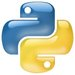
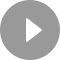
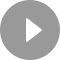
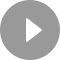
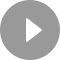
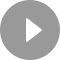
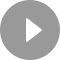
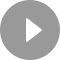
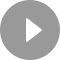

In [15]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
browser = webdriver.Chrome(options=chrome_options)
browser.get('https://www.baidu.com/')
browser.find_element_by_xpath('//*[@id="kw"]').send_keys('python')
browser.find_element_by_xpath('//*[@id="su"]').click()
time.sleep(3)

data = browser.page_source
data

In [5]:
browser.quit()

### Extract data from anjuke.com

###### extract data from the main page
  - including district, link, name, address, and determined prices

In [6]:
# get information of all district
districts = ['chaoyang', 'fengtai', 'haidian', 'tongzhou',
            'fangshan', 'shunyi', 'changping', 'daxing', 'miyun']
excel2 = pd.DataFrame(index=['district', 'link', 'name', 'address', 'price'])
all_info = []
for district in districts:
    print(district)
    
    # get proxy
    api = 'http://api.xdaili.cn/xdaili-api//greatRecharge/getGreatIp?spiderId=7152e27c30884783a5614375c6102b9a&orderno=YZ201911266834bj7dj5&returnType=1&count=1'
    proxy = requests.get(api).text
    proxy = proxy.strip()
    my_proxy = '--proxy-server=http://'+proxy
    # set chrome
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument(my_proxy)
    browser = webdriver.Chrome(options=chrome_options)
    # get source code
    url = 'https://bj.fang.anjuke.com/loupan/{}/w1/'.format(district)
    browser.get(url)
    data = browser.page_source
    # clear browser cache
    browser.quit()
    
    # get all houses' info
    p_info = '<div class="key-list imglazyload">(.*?)<div class="list-page">'
    infos = re.findall(p_info, data, re.S)
    all_info.append(infos[0])

chaoyang
fengtai
haidian
tongzhou


TimeoutException: Message: timeout
  (Session info: headless chrome=78.0.3904.108)


In [7]:
all_info

['\n                                                            <!-- 2017/07/27 -->\n            <div class="item-mod " data-link="https://bj.fang.anjuke.com/loupan/416443.html" data-soj="AF_RANK_1" rel="nofollow">\n\t\t<a class="pic" href="https://bj.fang.anjuke.com/loupan/416443.html?from=AF_RANK_1" soj="AF_RANK_1" target="_blank">\n            \n\t\t\t\t\t\t<i class="iconfont item-mod-video34">\uea82</i>\n\t\t\t            <div class="icon-qj-weliao">\n                                    <i class="iconfont title-icon icon-weliao">\uebbf</i>\n                                                    <i class="iconfont title-icon icon-qj">\uebbd</i>\n                            </div>\n\t\t<img width="180" height="135" src="https://pic4.ajkimg.com/display/xinfang/e87d91bf87b7ac664204f4583d5614f3/180x135m.jpg" alt="">\n            \t\t</a>\n            \t<div class="infos">\n\t\t\t<a class="lp-name" href="https://bj.fang.anjuke.com/loupan/416443.html?from=AF_RANK_1" soj="AF_RANK_1" target="_

In [12]:
excel2 = pd.read_excel('semi-info.xlsx', index=0)
col = ['index']
col.extend(excel2.columns[1:])
excel2.columns = col
excel2.index = excel2['index']

In [23]:
excel2

,index,林肯时代\n\t\t\t,恒大花溪小镇\n\t\t\t,湖光壹号\n\t\t\t,瑞悦府\n\t\t\t,北京城建•朝青知筑\n\t\t\t,中海枫丹公馆\n\t\t\t,北京恒大华府\n\t\t\t,天瑞宸章\n\t\t\t,丽都悦府\n\t\t\t,...,蓝桥驿苑\n\t\t\t,天同11号\n\t\t\t,金融街融汇\n\t\t\t,当代采育满庭春MOMA\n\t\t\t,北京明发广场\n\t\t\t,金第万科金域东郡\n\t\t\t,cago寓所\n\t\t\t,首开住总·国悦居\n\t\t\t,北京金科天籁城\n\t\t\t,旭辉汇璟园\n\t\t\t
index,,,,,,,,,,,,,,,,,,,,,
district,district,chaoyang,chaoyang,chaoyang,chaoyang,chaoyang,chaoyang,chaoyang,chaoyang,chaoyang,...,daxing,daxing,daxing,daxing,daxing,daxing,daxing,daxing,daxing,daxing
link,link,https://bj.fang.anjuke.com/loupan/453476.html,https://bj.fang.anjuke.com/loupan/417696.html,https://bj.fang.anjuke.com/loupan/416443.html?...,https://bj.fang.anjuke.com/loupan/435260.html?...,https://bj.fang.anjuke.com/loupan/439965.html?...,https://bj.fang.anjuke.com/loupan/455460.html?...,https://bj.fang.anjuke.com/loupan/400628.html?...,https://bj.fang.anjuke.com/loupan/445099.html?...,https://bj.fang.anjuke.com/loupan/437085.html?...,...,https://bj.fang.anjuke.com/loupan/249258.html?...,https://bj.fang.anjuke.com/loupan/252025.html?...,https://bj.fang.anjuke.com/loupan/240399.html?...,https://bj.fang.anjuke.com/loupan/250803.html?...,https://bj.fang.anjuke.com/loupan/247986.html?...,https://bj.fang.anjuke.com/loupan/248329.html?...,https://bj.fang.anjuke.com/loupan/237798.html?...,https://bj.fang.anjuke.com/loupan/264033.html?...,https://bj.fang.anjuke.com/loupan/264003.html?...,https://bj.fang.anjuke.com/loupan/412102.html?...
name,name,林肯时代,恒大花溪小镇,湖光壹号,瑞悦府,北京城建•朝青知筑,中海枫丹公馆,北京恒大华府,天瑞宸章,丽都悦府,...,蓝桥驿苑,天同11号,金融街融汇,当代采育满庭春MOMA,北京明发广场,金第万科金域东郡,cago寓所,首开住总·国悦居,北京金科天籁城,旭辉汇璟园
address,address,[大兴亦庄]荣京西街（荣京东街地铁站西600米）\n\t\t\t \t...,[北京周边其它]宝坻京津生态新城（津蓟高速九园线出口...\n\t\t\t ...,[朝阳望京]湖光中街\n\t\t\t \t\t ...,[朝阳孙河]北京市朝阳区黄康路北侧 孙河地铁站西...\n\t\t\t ...,[朝阳朝青]地铁6号线褡裢坡站B口东行200米\n\t\t\t \t\...,[朝阳其他]通惠河北路69号院（朝阳建国门桥东南1...\n\t\t\t ...,[朝阳东坝]东五环东坝七棵树以北、坝河以南\n\t\t\t \t\t ...,[朝阳孙河]京密路与顺黄路交汇处西南800米\n\t\t\t \t\t...,[朝阳望京]东四环，霄云桥北500米\n\t\t\t \t\t ...,...,[大兴黄村]孙村海鑫路北\n\t\t\t \t\t ...,[大兴黄村]大兴地铁4号大兴线黄村西大街站向西20...\n\t\t\t ...,[大兴天宫院]新城核心区地铁天宫院站北侧300米\n\t\t\t \t...,[大兴亦庄]采育镇\n\t\t\t \t\t \...,[大兴天宫院]大兴京开高速念坛出口新源大街与永兴路...\n\t\t\t ...,[大兴亦庄]大兴亦庄南海子公园东南约1800米\n\t\t\t \t\...,[大兴黄村]工业开发区广茂大街\n\t\t\t \t\t ...,[大兴亦庄]南海子公园北侧500米\n\t\t\t \t\t ...,[大兴天宫院]大兴生物医药基地东配套区北臧村镇，4...\n\t\t\t ...,[大兴旧宫]瀛海镇姜场村，南海子公园南侧800米，...\n\t\t\t ...
price,price,""">均价39800元/㎡",""">最低6888元/㎡起",""">均价85511元/㎡",""">总价600万元/套起",""">均价76000元/㎡",""">均价100798元/㎡",""">总价2300万元/套起",""">均价68924元/㎡","-txt"">售价待定",...,"-txt"">售价待定","-txt"">售价待定",""">均价22500元/㎡","-txt"">售价待定","-txt"">售价待定","-txt"">售价待定","-txt"">售价待定",""">均价22000元/㎡","-txt"">售价待定",""">均价17750元/㎡"


###### extract detailed information from details page
- including the information of surrounding (transportation/hospital/school/business)

 - transporation (bus / subway)

In [32]:
time_start = time.process_time()

# get information of all houses
# transportation only
link = excel2.loc['link', :]
all_houses = []
k = 1
for l in link[1:]:
    
    '''
    # get proxy
    api = 'http://api.xdaili.cn/xdaili-api//greatRecharge/getGreatIp?spiderId=7152e27c30884783a5614375c6102b9a&orderno=YZ201911266834bj7dj5&returnType=1&count=1'
    proxy = requests.get(api).text
    proxy = proxy.strip()
    my_proxy = '--proxy-server=http://'+proxy
    '''
    # set chrome
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument('--headless')
    # chrome_options.add_argument(my_proxy)
    browser = webdriver.Chrome(options=chrome_options)
    # get source code
    browser.get(l)
    data = browser.page_source
    # clear browser cache
    browser.quit()
    
    # get all houses' info
    all_houses.append(data)
    
    print(k, end=' ')
    
    k += 1
    
time_end = time.process_time()
print('time cost:', time_end - time_start, 's')

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

 - hospital

In [58]:
time_start = time.process_time()

# get information of all houses
# hospital only
link = excel2.loc['link', :]
all_hos = []
k = 1
j = 0
for l in link[1:]:
    
    '''
    # get proxy
    api = 'http://api.xdaili.cn/xdaili-api//greatRecharge/getGreatIp?spiderId=7152e27c30884783a5614375c6102b9a&orderno=YZ201911266834bj7dj5&returnType=1&count=1'
    proxy = requests.get(api).text
    proxy = proxy.strip()
    my_proxy = '--proxy-server=http://'+proxy
    '''
    # set chrome
    #chrome_options = webdriver.ChromeOptions()
    #chrome_options.add_argument('--headless')
    # chrome_options.add_argument(my_proxy)
    #browser = webdriver.Chrome(options=chrome_options)
    browser = webdriver.Chrome()
    # get source code
    browser.get(l)
    try:
        browser.find_element_by_xpath('//*[@id="life-tab-hos"]/a').click()
        data = browser.page_source
    #except:
        #browser.find_element_by_css_selector('#life-tab-hos > a').click()
        #data = browser.page_source
    except:
        data = 'NOT FOUND'
    # clear browser cache
    browser.quit()
    
    # get all houses' info
    all_hos.append(data)
    
    print(k, end=' ')
    
    k += 1
    
time_end = time.process_time()
print('time cost:', time_end - time_start, 's')

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 

TimeoutException: Message: timeout
  (Session info: chrome=78.0.3904.108)


In [1]:
# continue to extract data of hospital after debugging
for l in link[82:]:
    
    '''
    # get proxy
    api = 'http://api.xdaili.cn/xdaili-api//greatRecharge/getGreatIp?spiderId=7152e27c30884783a5614375c6102b9a&orderno=YZ201911266834bj7dj5&returnType=1&count=1'
    proxy = requests.get(api).text
    proxy = proxy.strip()
    my_proxy = '--proxy-server=http://'+proxy
    '''
    # set chrome
    #chrome_options = webdriver.ChromeOptions()
    #chrome_options.add_argument('--headless')
    # chrome_options.add_argument(my_proxy)
    #browser = webdriver.Chrome(options=chrome_options)
    browser = webdriver.Chrome()
    # get source code
    browser.get(l)
    try:
        browser.find_element_by_xpath('//*[@id="life-tab-hos"]/a').click()
        data = browser.page_source
    #except:
        #browser.find_element_by_css_selector('#life-tab-hos > a').click()
        #data = browser.page_source
    except:
        data = 'NOT FOUND'
    # clear browser cache
    browser.quit()
    
    # get all houses' info
    all_hos.append(data)
    
    print(k, end=' ')
    
    k += 1
    
    time.sleep(3)

NameError: name 'link' is not defined

 - school

In [76]:
# get information of all houses
# school only
link = excel2.loc['link', :]
all_school = []
k = 1
for l in link[1:]:
    
    '''
    # get proxy
    api = 'http://api.xdaili.cn/xdaili-api//greatRecharge/getGreatIp?spiderId=7152e27c30884783a5614375c6102b9a&orderno=YZ201911266834bj7dj5&returnType=1&count=1'
    proxy = requests.get(api).text
    proxy = proxy.strip()
    my_proxy = '--proxy-server=http://'+proxy
    '''
    # set chrome
    #chrome_options = webdriver.ChromeOptions()
    #chrome_options.add_argument('--headless')
    # chrome_options.add_argument(my_proxy)
    #browser = webdriver.Chrome(options=chrome_options)
    browser = webdriver.Chrome()
    # get source code
    browser.get(l)
    try:
        browser.find_element_by_xpath('//*[@id="life-tab-edu"]/a').click()
        data = browser.page_source
    #except:
        #browser.find_element_by_css_selector('#life-tab-hos > a').click()
        #data = browser.page_source
    except:
        data = 'NOT FOUND'
    # clear browser cache
    browser.quit()
    
    # get all houses' info
    all_school.append(data)
    
    print(k, end=' ')
    
    k += 1
    
    time.sleep(3)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

 - business

In [79]:
# get information of all houses
# business only
link = excel2.loc['link', :]
all_buz = []
k = 1
for l in link[1:]:
    
    '''
    # get proxy
    api = 'http://api.xdaili.cn/xdaili-api//greatRecharge/getGreatIp?spiderId=7152e27c30884783a5614375c6102b9a&orderno=YZ201911266834bj7dj5&returnType=1&count=1'
    proxy = requests.get(api).text
    proxy = proxy.strip()
    my_proxy = '--proxy-server=http://'+proxy
    '''
    # set chrome
    #chrome_options = webdriver.ChromeOptions()
    #chrome_options.add_argument('--headless')
    # chrome_options.add_argument(my_proxy)
    #browser = webdriver.Chrome(options=chrome_options)
    browser = webdriver.Chrome()
    # get source code
    browser.get(l)
    try:
        browser.find_element_by_xpath('//*[@id="life-tab-biz"]/a').click()
        data = browser.page_source
    #except:
        #browser.find_element_by_css_selector('#life-tab-hos > a').click()
        #data = browser.page_source
    except:
        data = 'NOT FOUND'
    # clear browser cache
    browser.quit()
    
    # get all houses' info
    all_buz.append(data)
    
    print(k, end=' ')
    
    k += 1

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 

KeyboardInterrupt: 

In [87]:
# continue to extract data of hospital after debugging
for l in link[174:]:
    
    '''
    # get proxy
    api = 'http://api.xdaili.cn/xdaili-api//greatRecharge/getGreatIp?spiderId=7152e27c30884783a5614375c6102b9a&orderno=YZ201911266834bj7dj5&returnType=1&count=1'
    proxy = requests.get(api).text
    proxy = proxy.strip()
    my_proxy = '--proxy-server=http://'+proxy
    '''
    # set chrome
    #chrome_options = webdriver.ChromeOptions()
    #chrome_options.add_argument('--headless')
    # chrome_options.add_argument(my_proxy)
    #browser = webdriver.Chrome(options=chrome_options)
    browser = webdriver.Chrome()
    # get source code
    browser.get(l)
    try:
        browser.find_element_by_xpath('//*[@id="life-tab-biz"]/a').click()
        data = browser.page_source
    #except:
        #browser.find_element_by_css_selector('#life-tab-hos > a').click()
        #data = browser.page_source
    except:
        data = 'NOT FOUND'
    # clear browser cache
    browser.quit()
    
    # get all houses' info
    all_buz.append(data)
    
    print(k, end=' ')
    
    k += 1

174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376 377 378 379 

###### save all source code in a file

 - check the number of source code for each type of information

In [73]:
len(all_houses)

379

In [72]:
len(all_hos)

379

In [77]:
len(all_school)

379

In [88]:
len(all_buz)

379

 - save all the source code

In [74]:
import codecs
f = codecs.open('C:\\Users\\69414\\all_houses.txt', 'w', 'utf-8')
for a in all_houses:
    f.write(str(a))
    f.write('17000159051700015905')
f.close()

In [75]:
import codecs
f = codecs.open('C:\\Users\\69414\\all_hos.txt', 'w', 'utf-8')
for a in all_hos:
    f.write(str(a))
    f.write('17000159051700015905')
f.close()

In [78]:
import codecs
f = codecs.open('C:\\Users\\69414\\all_school.txt', 'w', 'utf-8')
for a in all_school:
    f.write(str(a))
    f.write('17000159051700015905')
f.close()

In [89]:
import codecs
f = codecs.open('C:\\Users\\69414\\all_buz.txt', 'w', 'utf-8')
for a in all_buz:
    f.write(str(a))
    f.write('17000159051700015905')
f.close()

### supplement the information not found
 - hospital and school

###### check the number of 'NOT FOUND'

In [235]:
print('all_houses has ', all_houses.count('NOT FOUND'), 'NOT FOUND')
print('all_hos has ', all_hos.count('NOT FOUNDD'), 'NOT FOUNDD')
print('all_school has ', all_school.count('NOT FOUNDD'), 'NOT FOUNDD')
print('all_buz has ', all_buz.count('NOT FOUND'), 'NOT FOUND')

all_houses has  0 NOT FOUND
all_hos has  0 NOT FOUNDD
all_school has  1 NOT FOUNDD
all_buz has  1 NOT FOUND


 - supplement information of hospital

In [231]:
k = 1
for l, hos, i in zip(link[1:], all_hos, range(379)):
    if hos == 'NOT FOUND':
        print(k, end=' ')
        k += 1
        # set chrome
        browser = webdriver.Chrome()
        # get source code
        browser.get(l)
        try:
            browser.find_element_by_xpath('//*[@id="life-tab-hos"]/a').click()
            data = browser.page_source
        #except:
            #browser.find_element_by_css_selector('#life-tab-hos > a').click()
            #data = browser.page_source
        except:
            data = 'NOT FOUNDD'
        # clear browser cache
        browser.quit()

        # get all houses' info
        all_hos[i] = data

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 

 - supplement information of school

In [234]:
k = 1
for l, school, i in zip(link[1:], all_school, range(379)):
    if school == 'NOT FOUND':
        print(k, end=' ')
        k += 1
        # set chrome
        browser = webdriver.Chrome()
        # get source code
        browser.get(l)
        try:
            browser.find_element_by_xpath('//*[@id="life-tab-edu"]/a').click()
            data = browser.page_source
        #except:
            #browser.find_element_by_css_selector('#life-tab-hos > a').click()
            #data = browser.page_source
        except:
            data = 'NOT FOUNDD'
        # clear browser cache
        browser.quit()

        # get all houses' info
        all_school[i] = data

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 

# data processing

In [93]:
all_labels = []
all_peripheral = []

### extract smaller range of information block

 - including price, label, transportation, business

In [134]:
df_price = []
df_labels = []
df_trans = []
df_buz = []
k = 1
for trans, hos, school, buz in zip(all_houses, all_hos, all_school, all_buz):
    
    print(k, end=' ')
    p_price = '<div class="main-detail mod">.*?<div class="basic-details">.*?<dd class="price">(.*?)<dd>'
    price = re.findall(p_price, trans, re.S)
    price[0] = re.sub('\n', '', price[0].strip())
    price[0] = re.sub('<.*?>', '', price[0].strip())
    df_price.append(price[0])
    
    p_labels = '<div class="main-detail mod">.*?<div class="basic-details">.*?<div class="tags">(.*?)</div>'
    labels = re.findall(p_labels, trans, re.S)
    labels[0] = re.sub('\n', '', labels[0].strip())
    labels[0] = re.sub('<.*?>', '', labels[0].strip())
    df_labels.append(labels[0])
    
    peri = []
    p_peri = '<div class="mod life-content">.*?<div class="life-detail">.*?<div class="life-list">(.*?)<ul id="life-list"'
    p_trans = re.findall(p_peri, trans, re.S)
    p_trans[0] = re.sub('\n', '', p_trans[0].strip())
    p_trans[0] = re.sub('<.*?>', '', p_trans[0].strip())
    df_trans.append(p_trans[0])
    
    '''
    p_hos = re.findall(p_peri, hos, re.S)
    p_hos[0] = re.sub('\n', '', p_hos[0].strip())
    p_hos[0] = re.sub('<.*?>', '', p_hos[0].strip())
    
    p_school = re.findall(p_peri, school, re.S)
    p_school[0] = re.sub('\n', '', p_school[0].strip())
    p_school[0] = re.sub('<.*?>', '', p_school[0].strip())
    '''
    if buz == 'NOT FOUND':
        df_buz.append('NOT FOUND')
    else:
        p_buz = re.findall(p_peri, buz, re.S)
        p_buz[0] = re.sub('\n', '', p_buz[0].strip())
        p_buz[0] = re.sub('<.*?>', '', p_buz[0].strip())
        df_buz.append(p_buz[0])
    
    k += 1

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

 - including school and hospital

In [244]:
df_school = []
df_hos = []
k = 1
for hos, school in zip(all_hos, all_school):
    
    print(k, end=' ')
    
    p_peri = '<div class="mod life-content">.*?<div class="life-detail">.*?<div class="life-list">(.*?)<ul id="life-list"'

    if '页面已经被删除' in hos:
        df_hos.append('LOST')
    else:
        p_hos = re.findall(p_peri, hos, re.S)
        p_hos[0] = re.sub('\n', '', p_hos[0].strip())
        p_hos[0] = re.sub('<.*?>', '', p_hos[0].strip())
        df_hos.append(p_hos[0])
    
    if school == 'NOT FOUNDD':
        df_school.append('NOT FOUNDD')
    elif '页面已经被删除' in school:
        df_school.append('LOST')
    else:
        p_school = re.findall(p_peri, school, re.S)
        p_school[0] = re.sub('\n', '', p_school[0].strip())
        p_school[0] = re.sub('<.*?>', '', p_school[0].strip())
        df_school.append(p_school[0])
    
    k += 1

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

In [260]:
df_school

['2公里内的交通设施                3条地铁、25个公交站',
 '2公里内的教育设施                暂无数据',
 '2公里内的教育设施                学校25处',
 '2公里内的教育设施                学校10处',
 '2公里内的教育设施                学校25处',
 '2公里内的教育设施                学校25处',
 '2公里内的教育设施                学校23处',
 '2公里内的教育设施                学校2处',
 '2公里内的教育设施                学校25处',
 '2公里内的教育设施                学校2处',
 '2公里内的教育设施                学校15处',
 '2公里内的教育设施                学校8处',
 '2公里内的教育设施                学校10处',
 '2公里内的教育设施                学校25处',
 '2公里内的教育设施                学校25处',
 '2公里内的教育设施                学校25处',
 '2公里内的教育设施                学校25处',
 '2公里内的教育设施                学校25处',
 'NOT FOUNDD',
 '2公里内的教育设施                学校25处',
 '2公里内的教育设施                学校25处',
 '2公里内的教育设施                学校25处',
 '2公里内的教育设施                学校25处',
 '2公里内的教育设施                学校25处',
 '2公里内的教育设施                学校25处',
 '2公里内的教育设施                学校25处',
 '2公里内的教育设施                学校25处',
 '2公里内的教育设施                学校25处',
 '2公里内的教育设施                学校25处',
 '2

### Extract specific numbers of school/hospital/transportation/business

- schools

In [268]:
df_schools = []
k = 1
for school in df_school:
    print(k, end=' ')
    if school.isspace():
        df_schools.append('nan')
    else:
        school = school[25:]
        if '学校' in school:
            nums = re.findall('学校(.*?)处', school, re.S)
            df_schools.append(nums[0])
        else:
            df_schools.append(0)

    k += 1

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

In [270]:
excel2.loc['schools',:] = ['schools'] + df_schools
excel2.loc['school',:] = ['school'] + df_school

In [272]:
excel2.to_excel('semi-info+price+labels+trans+buz+hos+school.xlsx')

- hospital

In [255]:
df_hospitals = []
k = 1
for hos in df_hos:
    print(k, end=' ')
    if hos.isspace():
        df_hospitals.append('nan')
    else:
        hos = hos[25:]
        if '医院' in hos:
            nums = re.findall('医院(.*?)处', hos, re.S)
            df_hospitals.append(nums[0])
        else:
            df_hospitals.append(0)

    k += 1

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

In [257]:
excel2.loc['hospitals',:] = ['hospitals'] + df_hospitals
excel2.loc['hos',:] = ['hos'] + df_hos

In [259]:
excel2.to_excel('semi-info+price+labels+trans+buz+hos.xlsx')

- trans

In [201]:
df_subway = []
df_bus = []
k = 1
for tr in df_trans:
    print(k, end=' ')
    if tr.isspace():
        df_subway.append('nan')
        df_bus.append('nan')
    else:
        tr = tr[25:]
        if '条地铁' in tr:
            df_subway.append(tr[0])
            tr = tr[5:]
        else:
            df_subway.append(0)
        if '公交站' in tr:
            num = re.findall('\d+\.?\d*', tr, re.S)
            df_bus.append(num[0])
        else:
            df_bus.append(0)
    k += 1

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

In [203]:
excel2.loc['subway',:] = ['subway'] + df_subway
excel2.loc['bus',:] = ['bus'] + df_bus
excel2.loc['trans',:] = ['trans'] + df_trans

In [205]:
excel2.to_excel('semi-info+price+labels+trans+buz.xlsx')

- business

In [214]:
df_shopping = []
df_bank = []
df_food = []
k = 1
for buz in df_buz:
    print(k, end=' ')
    if buz.isspace():
        df_shopping.append('nan')
        df_bank.append('nan')
        df_food.append('nan')
    else:
        buz = buz[25:]
        if '购物' in buz:
            shopping = re.findall('购物(.*?)处', buz, re.S)
            df_shopping.append(shopping[0])
        else:
            df_shopping.append(0)
        if '银行' in buz:
            bank = re.findall('银行(.*?)处', buz, re.S)
            df_bank.append(bank[0])
        else:
            df_bank.append(0)
        if '餐饮' in buz:
            food = re.findall('餐饮(.*?)处', buz, re.S)
            df_food.append(food[0])
        else:
            df_food.append(0)
    k += 1

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

In [218]:
excel2.loc['shopping',:] = ['shopping'] + df_shopping
excel2.loc['bank',:] = ['bank'] + df_bank
excel2.loc['food',:] = ['food'] + df_food

In [221]:
excel2.loc['business',:] = ['business'] + df_buz

In [222]:
excel2.to_excel('semi-info+price+labels+trans+buz.xlsx')

### Extract specific condition of furnish/volume

- labels

In [161]:
df_furnish = [] # 1代表装修 0代表毛坯
df_volume = [] # 1代表低容积，0代表无
k = 1
for label in df_labels:
    print(k, end=' ')
    if '装修交付' in label:
        df_furnish.append(1)
    else:
        df_furnish.append(0)
    if '低容积' in label:
        df_volume.append(1)
    else:
        df_volume.append(0)
    
    k += 1

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

In [166]:
excel2.loc['furnish',:] = ['furnish'] + df_furnish
excel2.loc['volume',:] = ['volume'] + df_volume
excel2.loc['labels',:] = ['labels'] + df_labels

In [169]:
excel2.to_excel('semi-info+price+labels.xlsx')

### Extract specific number of price

- price

In [149]:
df_price_num = []
k = 1
for p in df_price:
    print(k, end=' ')
    # set price of villa to nan (because it is not in the scope of the study)
    if '套' in p:
        df_price_num.append('nan')
    else:
        p_ = re.sub('\uebf5', '', p)
        num = re.findall('\d+\.?\d*', p_, re.S)
        if num:
            df_price_num.append(num[0])
        else:
            df_price_num.append('nan')
    k += 1

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 

In [155]:
excel2.loc['price_new',:] = ['price_new'] + df_price_num

In [157]:
excel2.to_excel('semi-info+price.xlsx')

### Extract specific information of link, name, address

In [130]:
# pick out the numbers
re.findall('\d+\.?\d*', df_price[0], re.S)

['39800']

In [133]:
trans

'<html><head><script src="https://zz.bdstatic.com/linksubmit/push.js"></script><script src="//hm.baidu.com/hm.js?c5899c8768ebee272710c9c5f365a6d8"></script>\n<meta charset="utf-8">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>住总香榭8号，北京住总香榭8号房价，楼盘户型，周边配套，交通地图，朝阳西大望路24号 - 安居客</title>\n    <meta name="keywords" content="住总香榭8号,香榭8号">\n<meta name="description" content="安居客为您提供北京住总香榭8号楼盘详情信息，住总香榭8号房价走势，住总香榭8号户型图，住总香榭8号周边配套，了解更多该楼盘信息，就上安居客。">\n<link rel="canonical" href="https://bj.fang.anjuke.com/loupan/298185.html?from=AF_RANK_24">\n<link rel="alternate" media="only screen and(max-width: 640px)" href="https://m.anjuke.com/bj/loupan/298185/">\n    <meta name="mobile-agent" content="format=html5;url=https://m.anjuke.com/bj/loupan/298185/">\n<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n    <link rel="stylesheet" rev="stylesheet" href="https://include.anjukestatic.com/aifang/res/41771/b/Aifang_Web_Loupan_View2_NewIndex.css" type="text/css">\n

In [ ]:
for info in all_info:
    # divide into single house's info
    houses = info.split('<!-- 2017/07/27 -->')
    
    k=1
    
    for house in houses[1:]:
        print(k, end=' ')
        k += 1
        
        # create a list to store info of the house
        house_list = [district]

        # info except price
        p_info = '<div class="infos"(.*?)<a class="favor-pos"'
        info = re.findall(p_info, house, re.S)
        ### link
        p_link = '<a class="lp-name" href="(.*?)" soj='
        link = re.findall(p_link, info[0], re.S)
        house_list.append(link[0])
        ### name
        p_name = '<span class="items-name">(.*?)<a class="address"'
        name = re.findall(p_name, info[0], re.S)
        name[0] = re.sub('<.*?>', '', name[0].strip())
        house_list.append(name[0].strip())
        ### address
        p_address = '<a class="address" .*?<span class="list-map"(.*?)<a class="tags-wrap"'
        address = re.findall(p_address, info[0], re.S)
        address[0] = re.sub('<.*?>', '', address[0].strip())
        address[0] = re.sub('&nbsp;', '', address[0].strip())
        address[0] = re.sub('.*?>', '', address[0].strip())
        house_list.append(address[0].strip())
        '''
        ### labels
        p_labels = '<a class="tags-wrap".*?<div class="tag-panel">(.*?)<a class="favor-pos">'
        labels = re.findall(p_labels, info[0], re.S)
        labels[0] = re.sub('<.*?class.*?>', ',', labels[0].strip())
        labels[0] = re.sub('<.*?>', '', labels[0].strip())
        labels[0] = re.sub('\n', '', labels[0].strip())
        house_list.append(labels[0].strip())
        '''
        
        # price
        p_price = '<a class="favor-pos".*?<p class="price(.*?)</p>'
        ### if the price is not determined, use the average price of the surrounding houses
        if '售价待定' in price[0]:
            p_around = '<p class="favor-tag around-price">(.*?)</p>'
            price = re.findall(p_around, house, re.S)
            if price:
                c_price = re.sub('<.*?>', '', price[0].strip())
            else:
                c_price = 'nan'
        else:
            price = re.findall(p_price, house, re.S)
            c_price = re.sub('<.*?>', '', price[0].strip())

        house_list.append(c_price)

        # add to the dataframe
        excel2[name[0]] = house_list

In [114]:
### a test run of the information for one house
for house in houses[1:]:
    house_list = [district]
    
    p_info = '<div class="infos"(.*?)<a class="favor-pos"'
    info = re.findall(p_info, house, re.S)
    # link
    p_link = '<a class="lp-name" href="(.*?)" soj='
    link = re.findall(p_link, info[0], re.S)
    house_list.append(link[0])
    
    # name
    p_name = '<span class="items-name">(.*?)<a class="address"'
    name = re.findall(p_name, info[0], re.S)
    name[0] = re.sub('<.*?>', '', name[0].strip())
    house_list.append(name[0].strip())
    
    # address
    p_address = '<a class="address" .*?<span class="list-map"(.*?)<a class="tags-wrap"'
    address = re.findall(p_address, info[0], re.S)
    address[0] = re.sub('<.*?>', '', address[0].strip())
    address[0] = re.sub('&nbsp;', '', address[0].strip())
    address[0] = re.sub('.*?>', '', address[0].strip())
    house_list.append(address[0].strip())
    
    '''
    # labels
    p_labels = '<a class="tags-wrap".*?<div class="tag-panel">(.*?)<a class="favor-pos">'
    labels = re.findall(p_labels, info[0], re.S)
    labels[0] = re.sub('<.*?class.*?>', ',', labels[0].strip())
    labels[0] = re.sub('<.*?>', '', labels[0].strip())
    labels[0] = re.sub('\n', '', labels[0].strip())
    house_list.append(labels[0].strip())
    '''
    
    # price
    p_price = '<a class="favor-pos".*?<p class="price(.*?)</p>'
    price = re.findall(p_price, house, re.S)
    price[0] = re.sub('<.*?>', '', price[0].strip())
    house_list.append(price[0].strip())
    
    excel[name[0]] = house_list

In [273]:
excel2

,index,林肯时代\n\t\t\t,恒大花溪小镇\n\t\t\t,湖光壹号\n\t\t\t,瑞悦府\n\t\t\t,北京城建•朝青知筑\n\t\t\t,中海枫丹公馆\n\t\t\t,北京恒大华府\n\t\t\t,天瑞宸章\n\t\t\t,丽都悦府\n\t\t\t,...,蓝桥驿苑\n\t\t\t,天同11号\n\t\t\t,金融街融汇\n\t\t\t,当代采育满庭春MOMA\n\t\t\t,北京明发广场\n\t\t\t,金第万科金域东郡\n\t\t\t,cago寓所\n\t\t\t,首开住总·国悦居\n\t\t\t,北京金科天籁城\n\t\t\t,旭辉汇璟园\n\t\t\t
index,,,,,,,,,,,,,,,,,,,,,
district,district,chaoyang,chaoyang,chaoyang,chaoyang,chaoyang,chaoyang,chaoyang,chaoyang,chaoyang,...,daxing,daxing,daxing,daxing,daxing,daxing,daxing,daxing,daxing,daxing
link,link,https://bj.fang.anjuke.com/loupan/453476.html,https://bj.fang.anjuke.com/loupan/417696.html,https://bj.fang.anjuke.com/loupan/416443.html?...,https://bj.fang.anjuke.com/loupan/435260.html?...,https://bj.fang.anjuke.com/loupan/439965.html?...,https://bj.fang.anjuke.com/loupan/455460.html?...,https://bj.fang.anjuke.com/loupan/400628.html?...,https://bj.fang.anjuke.com/loupan/445099.html?...,https://bj.fang.anjuke.com/loupan/437085.html?...,...,https://bj.fang.anjuke.com/loupan/249258.html?...,https://bj.fang.anjuke.com/loupan/252025.html?...,https://bj.fang.anjuke.com/loupan/240399.html?...,https://bj.fang.anjuke.com/loupan/250803.html?...,https://bj.fang.anjuke.com/loupan/247986.html?...,https://bj.fang.anjuke.com/loupan/248329.html?...,https://bj.fang.anjuke.com/loupan/237798.html?...,https://bj.fang.anjuke.com/loupan/264033.html?...,https://bj.fang.anjuke.com/loupan/264003.html?...,https://bj.fang.anjuke.com/loupan/412102.html?...
name,name,林肯时代,恒大花溪小镇,湖光壹号,瑞悦府,北京城建•朝青知筑,中海枫丹公馆,北京恒大华府,天瑞宸章,丽都悦府,...,蓝桥驿苑,天同11号,金融街融汇,当代采育满庭春MOMA,北京明发广场,金第万科金域东郡,cago寓所,首开住总·国悦居,北京金科天籁城,旭辉汇璟园
address,address,[大兴亦庄]荣京西街（荣京东街地铁站西600米）\n\t\t\t \t...,[北京周边其它]宝坻京津生态新城（津蓟高速九园线出口...\n\t\t\t ...,[朝阳望京]湖光中街\n\t\t\t \t\t ...,[朝阳孙河]北京市朝阳区黄康路北侧 孙河地铁站西...\n\t\t\t ...,[朝阳朝青]地铁6号线褡裢坡站B口东行200米\n\t\t\t \t\...,[朝阳其他]通惠河北路69号院（朝阳建国门桥东南1...\n\t\t\t ...,[朝阳东坝]东五环东坝七棵树以北、坝河以南\n\t\t\t \t\t ...,[朝阳孙河]京密路与顺黄路交汇处西南800米\n\t\t\t \t\t...,[朝阳望京]东四环，霄云桥北500米\n\t\t\t \t\t ...,...,[大兴黄村]孙村海鑫路北\n\t\t\t \t\t ...,[大兴黄村]大兴地铁4号大兴线黄村西大街站向西20...\n\t\t\t ...,[大兴天宫院]新城核心区地铁天宫院站北侧300米\n\t\t\t \t...,[大兴亦庄]采育镇\n\t\t\t \t\t \...,[大兴天宫院]大兴京开高速念坛出口新源大街与永兴路...\n\t\t\t ...,[大兴亦庄]大兴亦庄南海子公园东南约1800米\n\t\t\t \t\...,[大兴黄村]工业开发区广茂大街\n\t\t\t \t\t ...,[大兴亦庄]南海子公园北侧500米\n\t\t\t \t\t ...,[大兴天宫院]大兴生物医药基地东配套区北臧村镇，4...\n\t\t\t ...,[大兴旧宫]瀛海镇姜场村，南海子公园南侧800米，...\n\t\t\t ...
price,price,""">均价39800元/㎡",""">最低6888元/㎡起",""">均价85511元/㎡",""">总价600万元/套起",""">均价76000元/㎡",""">均价100798元/㎡",""">总价2300万元/套起",""">均价68924元/㎡","-txt"">售价待定",...,"-txt"">售价待定","-txt"">售价待定",""">均价22500元/㎡","-txt"">售价待定","-txt"">售价待定","-txt"">售价待定","-txt"">售价待定",""">均价22000元/㎡","-txt"">售价待定",""">均价17750元/㎡"
price_new,price_new,39800,6888,85511,nan,76000,100798,nan,68924,nan,...,42108,59326,22500,52695,39133,59343,60404,22000,38711,17750
furnish,furnish,0,0,0,0,0,1,1,1,0,...,0,1,1,0,0,1,1,0,0,0
volume,volume,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
labels,labels,标准写字楼 ...,住宅 ...,住宅 ...,住宅 ...,住宅 ...,住宅 ...,住宅 ...,住宅 ...,住宅 ...,...,住宅 ...,住宅 ...,住宅 ...,住宅 ...,住宅 ...,住宅 ...,住宅 ...,住宅 ...,住宅 ...,住宅 ...


# preparation for linear regression

In [278]:
data2 = excel2.T
data2.columns

Index(['district', 'link', 'name', 'address', 'price', 'price_new', 'furnish',
       'volume', 'labels', 'subway', 'bus', 'trans', 'shopping', 'bank',
       'food', 'business', 'hospitals', 'hos', 'schools', 'school'],
      dtype='object', name='index')

In [279]:
data2 = data2.loc[:,['district', 'price_new', 'furnish',
       'volume', 'subway', 'bus', 'shopping', 'bank',
       'food', 'hospitals', 'schools']]

In [282]:
data2.drop(data2[data2['price_new'] == 'nan'].index, inplace=True)

In [287]:
data2.drop(['index'], inplace=True)

In [291]:
data2.to_excel('house-info-have price.xlsx')

In [294]:
data2 = pd.read_excel('house-info-have price.xlsx', index_col=0)

In [298]:
data2 = data2.fillna(0)

In [299]:
data2.to_excel('house-info-fillna.xlsx')

# Other Attempts

### Use API proxies to prevent crawlers from being banned

- house prices

In [23]:
districts = ['chaoyang', 'fengtai', 'haidian', 'tongzhou',
            'fangshan', 'shunyi', 'changping', 'daxing', 'miyun']
for district in districts:
    api = 'http://api.xdaili.cn/xdaili-api//greatRecharge/getGreatIp?spiderId=7152e27c30884783a5614375c6102b9a&orderno=YZ201911266834bj7dj5&returnType=1&count=1'
    proxy = requests.get(api).text
    browser = webdriver.Chrome()
    
    break

In [28]:
api = 'http://api.xdaili.cn/xdaili-api//greatRecharge/getGreatIp?spiderId=7152e27c30884783a5614375c6102b9a&orderno=YZ201911266834bj7dj5&returnType=1&count=10'
proxys = requests.get(api).text
proxys = proxys.split('\r')
for i, proxy in enumerate(proxys):
    proxys[i] = proxy.strip()
del proxys[-1]

['220.162.146.42:44919',
 '125.123.124.226:42520',
 '222.85.39.34:35981',
 '36.57.71.4:37328',
 '222.79.228.120:48599',
 '120.41.115.11:39401',
 '113.128.26.112:42325',
 '49.85.238.7:39513',
 '144.0.91.150:45142',
 '171.12.166.166:48532',
 '']

In [96]:
excel = pd.DataFrame(index=['district', 'link', 'name', 'address', 'price'])

In [105]:
browser = webdriver.Chrome()
url = 'https://bj.fang.anjuke.com/loupan/chaoyang/w1/'
url2 = 'https://bj.fang.anjuke.com/loupan/chaoyang/p2_w1/'
browser.get(url2)
data = browser.page_source
data

'<html><head><script src="https://zz.bdstatic.com/linksubmit/push.js"></script><script src="//hm.baidu.com/hm.js?c5899c8768ebee272710c9c5f365a6d8"></script><script type="text/javascript" async="" src="https://cdn.zampda.net/s.js"></script>\n<meta charset="utf-8">\n<meta name="viewport" content="width=device-width, initial-scale=1">\n<title>北京朝阳住宅楼盘信息_北京朝阳住宅新房-安居客</title>\n    <meta name="keywords" content="北京朝阳住宅楼盘信息，北京朝阳住宅新房">\n<meta name="description" content="北京安居客，为您提供北京朝阳住宅楼盘信息,北京朝阳住宅新房。找新房楼盘就来安居客，安居客为您实现家的梦想。">\n<meta name="mobile-agent" content="format=html5; url=https://m.anjuke.com/bj/loupan/chaoyang/p2-w1/">\n<link rel="canonical" href="https://bj.fang.anjuke.com/loupan/chaoyang/p2_w1/">\n<link rel="alternate" media="only screen and(max-width: 640px)" href="https://m.anjuke.com/bj/loupan/chaoyang/p2-w1/">\n        <link rel="stylesheet" rev="stylesheet" href="https://include.anjukestatic.com/aifang/res/41771/b/Aifang_Web_Loupan_Listv4_ListIndex.css" type="text/css">\n<link re

In [106]:
p_info = '<div class="key-list imglazyload">(.*?)<div class="list-page">'
infos = re.findall(p_info, data, re.S)

In [109]:
houses = infos[0].split('<!-- 2017/07/27 -->')

In [127]:
api = 'http://api.xdaili.cn/xdaili-api//greatRecharge/getGreatIp?spiderId=7152e27c30884783a5614375c6102b9a&orderno=YZ201911266834bj7dj5&returnType=1&count=1'
proxy = requests.get(api).text
proxy.strip()

'121.232.165.247:30636'